In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


./iris.data.csv
./iris.ipynb
./.ipynb_checkpoints\iris-checkpoint.ipynb


In [2]:
train_df = pd.read_csv('./iris.data.csv', header = None)
train_df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
train_df.shape

(150, 5)

In [4]:
X = train_df.drop([4], axis=1)
y = train_df[4]

In [5]:
class_labels = list(set(y))
print(class_labels)

['Iris-virginica', 'Iris-versicolor', 'Iris-setosa']


In [6]:
def encode_labels(samples):
    res = []
    for sample in samples:
        for id, x in enumerate(class_labels):
            if x == sample:
                res.append(id)
                break
    return res
y = encode_labels(y)
y[:5]

[2, 2, 2, 2, 2]

In [7]:
X.shape

(150, 4)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                   random_state=69) 
y_train[:5]

[2, 2, 2, 0, 0]

In [9]:
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [10]:
y_train=tf.keras.utils.to_categorical(y_train,3)
y_test=tf.keras.utils.to_categorical(y_test,3)

In [11]:
input_size = 4
output_size = 3

number_of_neurons = [ [2,2,3],
                      [4,2,3],
                      [4,4,3], 
                      [3,4,6],
                      [6,5,4] ]

In [12]:
idx = 0

x = []
y = []

while idx < 5 :
    
    model = tf.keras.Sequential([
                            tf.keras.layers.InputLayer(input_shape=(4)),
                            tf.keras.layers.Dense(number_of_neurons[idx][0], activation='relu'),
                            tf.keras.layers.Dense(number_of_neurons[idx][1], activation='relu'),
                            tf.keras.layers.Dense(number_of_neurons[idx][2], activation='relu'),   
                            tf.keras.layers.Dense(output_size, activation='softmax')   
                            ])
    
    model.summary()
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    NUM_EPOCHS = 70

    model.fit(X_train,y_train, epochs = NUM_EPOCHS, validation_data=(X_test,y_test), verbose=0)
    
    y_predict = model.predict(X_test)
    
    y_pred = []
    
    for val in y_predict:
        y_pred.append(np.argmax(val))
        
    accuracy = metrics.accuracy_score(np.argmax(y_test,axis = 1) ,y_pred)
    recall = metrics.recall_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    precision = metrics.precision_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    f1_score = metrics.f1_score(np.argmax(y_test,axis = 1) ,y_pred,average='macro')
    cm = metrics.confusion_matrix(np.argmax(y_test,axis = 1) ,y_pred)
    
    print(cm)
    print("Accuracy:",accuracy)
    print("F1 score:",f1_score)
    print("Recall:",recall)
    print("Precision:",precision)
    print("\n\n")
    
    x.append(sum(number_of_neurons[idx]))
    y.append(accuracy)
    
    idx = idx + 1   


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
 dense_3 (Dense)             (None, 3)                 12        
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


c:\users\mange\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0 12  0]
 [ 0  8  0]
 [ 0 10  0]]
Accuracy: 0.26666666666666666
F1 score: 0.14035087719298248
Recall: 0.3333333333333333
Precision: 0.08888888888888889



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 2)                 10        
                                                                 
 dense_6 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 3)                 12        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


c:\users\mange\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[12  0  0]
 [ 8  0  0]
 [ 0  0 10]]
Accuracy: 0.7333333333333333
F1 score: 0.5833333333333334
Recall: 0.6666666666666666
Precision: 0.5333333333333333



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 4)                 20        
                                                                 
 dense_10 (Dense)            (None, 3)                 15        
                                                                 
 dense_11 (Dense)            (None, 3)                 12        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


c:\users\mange\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[[ 0 12  0]
 [ 0  8  0]
 [ 0  0 10]]
Accuracy: 0.6
F1 score: 0.5238095238095238
Recall: 0.6666666666666666
Precision: 0.4666666666666666



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 3)                 15        
                                                                 
 dense_13 (Dense)            (None, 4)                 16        
                                                                 
 dense_14 (Dense)            (None, 6)                 30        
                                                                 
 dense_15 (Dense)            (None, 3)                 21        
                                                                 
Total params: 82
Trainable params: 82
Non-trainable params: 0
_________________________________________________________________
[[12  0  0]
 [ 2  5  1]
 [ 0  0 10]]
Accuracy: 0.9

c:\users\mange\appdata\local\programs\python\python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
print(x)

[7, 9, 11, 13, 15]


In [16]:
print(y)

[0.26666666666666666, 0.7333333333333333, 0.6, 0.9, 0.6]


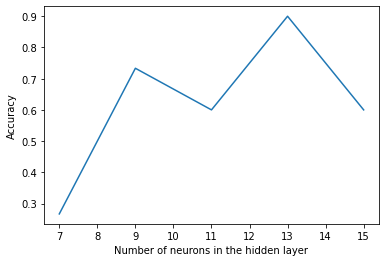

In [15]:
import matplotlib.pyplot as plt
# Plot the graph of error vs learning rate
plt.plot(x, y)
plt.xlabel('Number of neurons in the hidden layer')
plt.ylabel('Accuracy')
plt.show()